In [24]:
# 1.different ways to encode nominal features
# https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [26]:
df = pd.read_csv('data.csv')
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,u,g,0.00,w,0,True,v,1.25,True,1,False,202,g,Success
1,a,58.67,u,g,4.46,q,560,True,h,3.04,True,6,False,43,g,Success
2,a,24.5,u,g,0.50,q,824,False,h,1.50,True,0,False,280,g,Success
3,b,27.83,u,g,1.54,w,3,True,v,3.75,True,5,True,100,g,Success
4,b,25,u,g,11.25,c,1208,True,v,2.50,True,17,False,200,g,Success


In [27]:
# Columns A3 and A4 are same

df.drop('A4', axis=1, inplace=True)
df.replace('?',np.NaN,inplace=True)

26.676153846153845


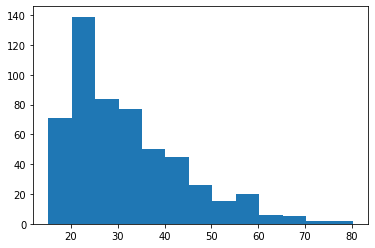

In [28]:
# Calculate max frequency bar value to fill A2 null values
bins = 13
data = df.loc[df['A2'].notnull(), 'A2'].astype(np.float64).tolist()
y, x, _ = plt.hist(data, histtype='bar', bins=bins)
y_max = y.max()
idx = np.where(y == y_max)[0][0]
A2_fill_value = x[idx] + bins/2
print(A2_fill_value)

In [29]:
# Calculate mean of A14 to fill null values
A14_fill_value = df.loc[df['A14'].notnull(), 'A14'].astype(np.float64).mean()

In [30]:
df=df.fillna({'A2':A2_fill_value,'A14':A14_fill_value})
df=df.fillna({'A1':'b', 'A3':'u', 'A6':'c', 'A9':'v'})

In [31]:
df.A2 = df.A2.astype(np.float64)
df.A14 = df.A14.astype(np.int64)

In [32]:
# encode A16 lables success =1 failure =0
df['A16'] = df['A16'].map({label:idx for idx,label in enumerate(np.unique(df['A16']))})
df['A1'] = df['A1'].map({label:idx for idx,label in enumerate(np.unique(df['A1']))})
df['A8'] = df['A8'].map({label:idx for idx,label in enumerate(np.unique(df['A8']))})
df['A11'] = df['A11'].map({label:idx for idx,label in enumerate(np.unique(df['A11']))})
df['A13'] = df['A13'].map({label:idx for idx,label in enumerate(np.unique(df['A13']))})


In [33]:
df.head()

,A1,A2,A3,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,u,0.00,w,0,1,v,1.25,1,1,0,202,g,1
1,0,58.67,u,4.46,q,560,1,h,3.04,1,6,0,43,g,1
2,0,24.50,u,0.50,q,824,0,h,1.50,1,0,0,280,g,1
3,1,27.83,u,1.54,w,3,1,v,3.75,1,5,1,100,g,1
4,1,25.00,u,11.25,c,1208,1,v,2.50,1,17,0,200,g,1


In [34]:
x_A3=pd.get_dummies(df[['A3']],drop_first=True)
x_A6=pd.get_dummies(df[['A6']],drop_first=True)
x_A9=pd.get_dummies(df[['A9']],drop_first=True)
x_A15=pd.get_dummies(df[['A15']],drop_first=True)
df=pd.concat([df['A1'],df['A2'],x_A3,df['A5'],x_A6,df['A7'],df['A8'],x_A9,df['A10'],df['A11'],df['A12'],df['A13'],df['A14'],x_A15,df['A16']],axis=1)


In [35]:
df.head()

,A1,A2,A3_u,A3_y,A5,A6_c,A6_cc,A6_d,A6_e,A6_ff,...,A9_v,A9_z,A10,A11,A12,A13,A14,A15_p,A15_s,A16
0,1,30.83,1,0,0.00,0,0,0,0,0,...,1,0,1.25,1,1,0,202,0,0,1
1,0,58.67,1,0,4.46,0,0,0,0,0,...,0,0,3.04,1,6,0,43,0,0,1
2,0,24.50,1,0,0.50,0,0,0,0,0,...,0,0,1.50,1,0,0,280,0,0,1
3,1,27.83,1,0,1.54,0,0,0,0,0,...,1,0,3.75,1,5,1,100,0,0,1
4,1,25.00,1,0,11.25,1,0,0,0,0,...,1,0,2.50,1,17,0,200,0,0,1


In [36]:
feature_cols=df.drop('A16', axis=1).columns

#split dataset in features and target variable
X = df[feature_cols] # Features
y = df.A16 # Target variable

In [37]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [38]:
#-------------- Feature scaling --------------------------------------------
# random forest, decision trees do not need feature scaling

stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)


In [39]:
#-------------------- Try different models ------------------------------------------------------------------

In [40]:
# Create Decision Tree classifer object
dtc_model_1 = DecisionTreeClassifier(max_depth=2)

# Train Decision Tree Classifer
dtc_model_1.fit(X_train,y_train)

#Predict the response for test dataset
dtc_pred = dtc_model_1.predict(X_test)
A = metrics.accuracy_score(y_test, dtc_pred)
P = metrics.precision_score(y_test, dtc_pred)
R = metrics.recall_score(y_test, dtc_pred)

F = 2*P*R/(P+R)

print("Accuracy:", A)
#print("Precision:", P)
#print("Recall:", R)
print("F score:", F)

Accuracy: 0.8674698795180723
F score: 0.8720930232558141


In [41]:
dtc_model_2 = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
dtc_model_2.fit(X_train,y_train)

#Predict the response for test dataset
dtc_pred_2 = dtc_model_2.predict(X_test)

A = metrics.accuracy_score(y_test, dtc_pred_2)
P = metrics.precision_score(y_test, dtc_pred_2)
R = metrics.recall_score(y_test, dtc_pred_2)

F = 2*P*R/(P+R)

print("Accuracy:", A)
#print("Precision:", P)
#print("Recall:", R)
print("F score:", F)

Accuracy: 0.8072289156626506
F score: 0.7948717948717948


In [42]:
#Create a Gaussian Classifier
gnb_model = GaussianNB()

#Train the model using the training sets
gnb_model.fit(X_train, y_train)

#Predict the response for test dataset
gnb_pred = gnb_model.predict(X_test)


A = metrics.accuracy_score(y_test, gnb_pred)
P = metrics.precision_score(y_test, gnb_pred)
R = metrics.recall_score(y_test, gnb_pred)

F = 2*P*R/(P+R)

print("Accuracy:", A)
#print("Precision:", P)
#print("Recall:", R)
print("F score:", F)

Accuracy: 0.6927710843373494
F score: 0.5853658536585367


In [43]:
knn_model = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

A = metrics.accuracy_score(y_test, knn_pred)
P = metrics.precision_score(y_test, knn_pred)
R = metrics.recall_score(y_test, knn_pred)

F = 2*P*R/(P+R)

print("Accuracy:", A)
#print("Precision:", P)
#print("Recall:", R)
print("F score:", F)

Accuracy: 0.8373493975903614
F score: 0.8258064516129032


In [75]:
from sklearn.metrics import mean_absolute_error
# Select best n_estimators for RandomForestClassifier
def getError(n_estimators, random_state, X_train, y_train):
    rfc_model=RandomForestClassifier(n_estimators=n_estimators, random_state = random_state)
    rfc_model.fit(X_train,y_train)
    rfc_pred=rfc_model.predict(X_test)
    A = metrics.accuracy_score(y_test, rfc_pred)
    P = metrics.precision_score(y_test, rfc_pred)
    R = metrics.recall_score(y_test, rfc_pred)

    F = 2*P*R/(P+R)
    print("n:",n_estimators," rs:", random_state, " Accuracy:", A , " F score:", F)
    plt.style.use('seaborn-whitegrid')
    #plt.plot( n_estimators, F, 'o')
    plt.plot( random_state, F, 'o')

#for ne in range(25, 500, 25):
#    getError(ne, X_train, y_train)

#for rs in range(0,50, 1):
#    getError(200, rs,X_train, y_train)

#found 
#n_estimators = 200
#random_state = 17

In [76]:
rfc_model=RandomForestClassifier(n_estimators=200, random_state = 17)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc_model.fit(X_train,y_train)

rfc_pred=rfc_model.predict(X_test)

A = metrics.accuracy_score(y_test, rfc_pred)
P = metrics.precision_score(y_test, rfc_pred)
R = metrics.recall_score(y_test, rfc_pred)

F = 2*P*R/(P+R)

print("Accuracy:", A)
#print("Precision:", P)
#print("Recall:", R)
print("F score:", F)

Accuracy: 0.9156626506024096
F score: 0.9078947368421053


In [45]:
#Create a svm Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_model.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm_model.predict(X_test)


A = metrics.accuracy_score(y_test, svm_pred)
P = metrics.precision_score(y_test, svm_pred)
R = metrics.recall_score(y_test, svm_pred)

F = 2*P*R/(P+R)

print("Accuracy:", A)
#print("Precision:", P)
#print("Recall:", R)
print("F score:", F)

Accuracy: 0.8614457831325302
F score: 0.8535031847133757


In [46]:
lr_model = LogisticRegression()

# fit the model with data
lr_model.fit(X_train,y_train)

lr_pred=lr_model.predict(X_test)

A = metrics.accuracy_score(y_test, lr_pred)
P = metrics.precision_score(y_test, lr_pred)
R = metrics.recall_score(y_test, lr_pred)

F = 2*P*R/(P+R)

print("Accuracy:", A)
#print("Precision:", P)
#print("Recall:", R)
print("F score:", F)

Accuracy: 0.8734939759036144
F score: 0.8679245283018868


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
